Домашнее задание 5:
Выберите несколько алгоритмов кластеризации 
Запустите их на своих данных и визуализируйте


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
df = pd.read_csv('dataset_PCA__v2.4.csv')

In [42]:
df

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,smiles,gap
0,-0.562489,0.630938,-0.709024,0.153706,0.227586,0.093760,-0.000980,0.251019,-0.144579,-0.286367,...,0.093716,0.000036,0.085001,-0.007364,0.061485,0.131232,-0.090100,0.017323,N=C1OCC2=C1ON=C2,0.374591
1,0.306667,-0.167819,-0.508875,0.193999,-0.544756,-0.493497,0.217452,0.003128,-0.095734,0.187467,...,0.037805,-0.059233,-0.057866,-0.089513,-0.068715,0.036187,-0.086054,-0.005047,O=C1CCC11C2CCN12,0.387385
2,0.278600,-0.418607,-0.118331,0.225714,0.091817,0.245929,0.855817,-0.300128,0.195795,-0.202910,...,0.057092,-0.030397,-0.077751,-0.018595,-0.075231,-0.036330,0.111681,-0.068999,O=CC1CCC2OCC12,0.424278
3,0.688534,0.350085,-1.051756,0.402856,0.066196,0.104259,0.423833,0.318708,-0.326733,0.026805,...,0.074733,0.059995,0.191946,-0.037698,0.141349,-0.168062,0.030100,0.016702,C1C2C3N=C4OC1C4C23,0.379946
4,-0.041598,-0.465372,-0.176061,-0.557432,0.263690,0.074901,-0.439579,0.091602,0.307701,-0.383285,...,-0.014388,-0.024493,0.114010,0.037069,0.046138,-0.050928,-0.044936,0.077362,CC1(O)C2CC1(O2)C#C,0.529604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16485,-0.173752,0.644016,-0.599059,-0.221979,0.024556,-0.002688,0.421316,0.407779,-0.311203,-0.268762,...,-0.003259,0.012706,-0.072985,-0.000642,-0.035770,0.008162,-0.092848,-0.000008,c1coc2c1C(=O)CC2,0.398096
16486,-0.326065,0.203733,-0.257154,0.070534,-0.683245,-0.148914,-0.404755,0.038189,0.723712,0.389277,...,0.027127,0.005993,-0.190037,-0.005162,0.020226,0.038417,0.225514,-0.053550,CC1CN1C(=N)C#N,0.382624
16487,-1.003912,-0.328250,-0.145512,-0.201196,0.068091,-0.449502,0.331198,0.300789,-0.101439,-0.187232,...,0.045449,0.021548,0.182419,-0.042952,-0.018724,0.224334,-0.050970,0.079347,COC1CC(=N)OC1=O,0.484082
16488,-0.086001,-0.753930,-0.500610,0.171508,0.788793,0.444747,-0.601452,0.480294,0.348392,0.316386,...,-0.092754,-0.029982,0.071004,0.059970,-0.108727,-0.103230,0.011052,0.027892,OC1CC11OCC1O,0.639096


In [43]:
X = df.drop(['smiles'], axis=1)


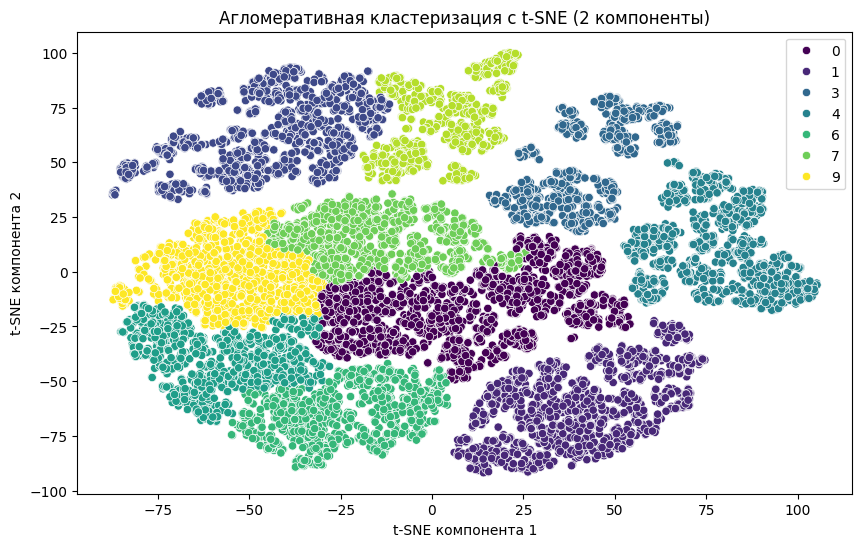

In [44]:
descriptors = pd.DataFrame()
descriptors = X.drop(columns=["gap"])

# Применяем t-SNE для снижения размерности с двумя компонентами
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(descriptors)

# Создаем экземпляр алгоритма кластеризации (агломеративный)
agglomerative = AgglomerativeClustering(n_clusters=10)
clusters = agglomerative.fit_predict(tsne_result)

# Визуализация результатов с помощью Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=clusters, palette='viridis')
plt.title('Агломеративная кластеризация с t-SNE (2 компоненты)')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

Очень хорошы видны кластеры

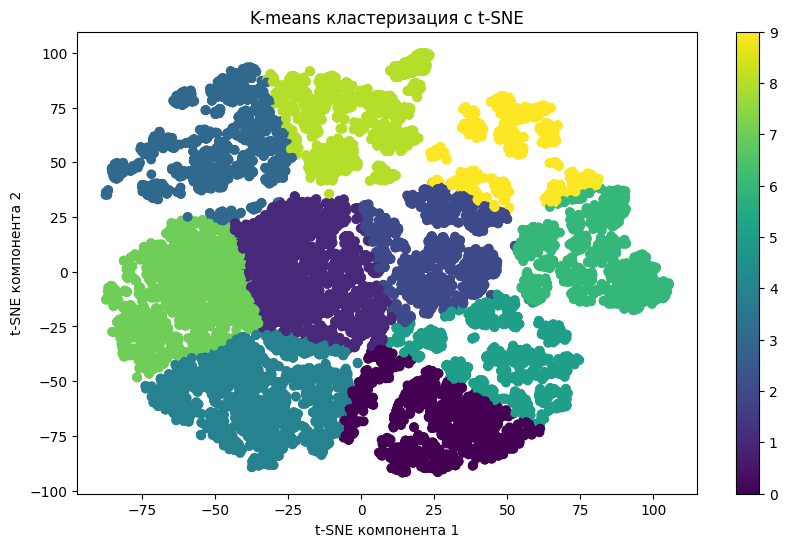

In [45]:
# Кластеризация с k-means
# Создаем экземпляр алгоритма кластеризации
kmeans = KMeans(n_clusters=10)

# Применяем кластеризацию к данным
kmeans.fit(tsne_result)
clusters = kmeans.labels_

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis')
plt.title('K-means кластеризация с t-SNE')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.colorbar()
plt.show()

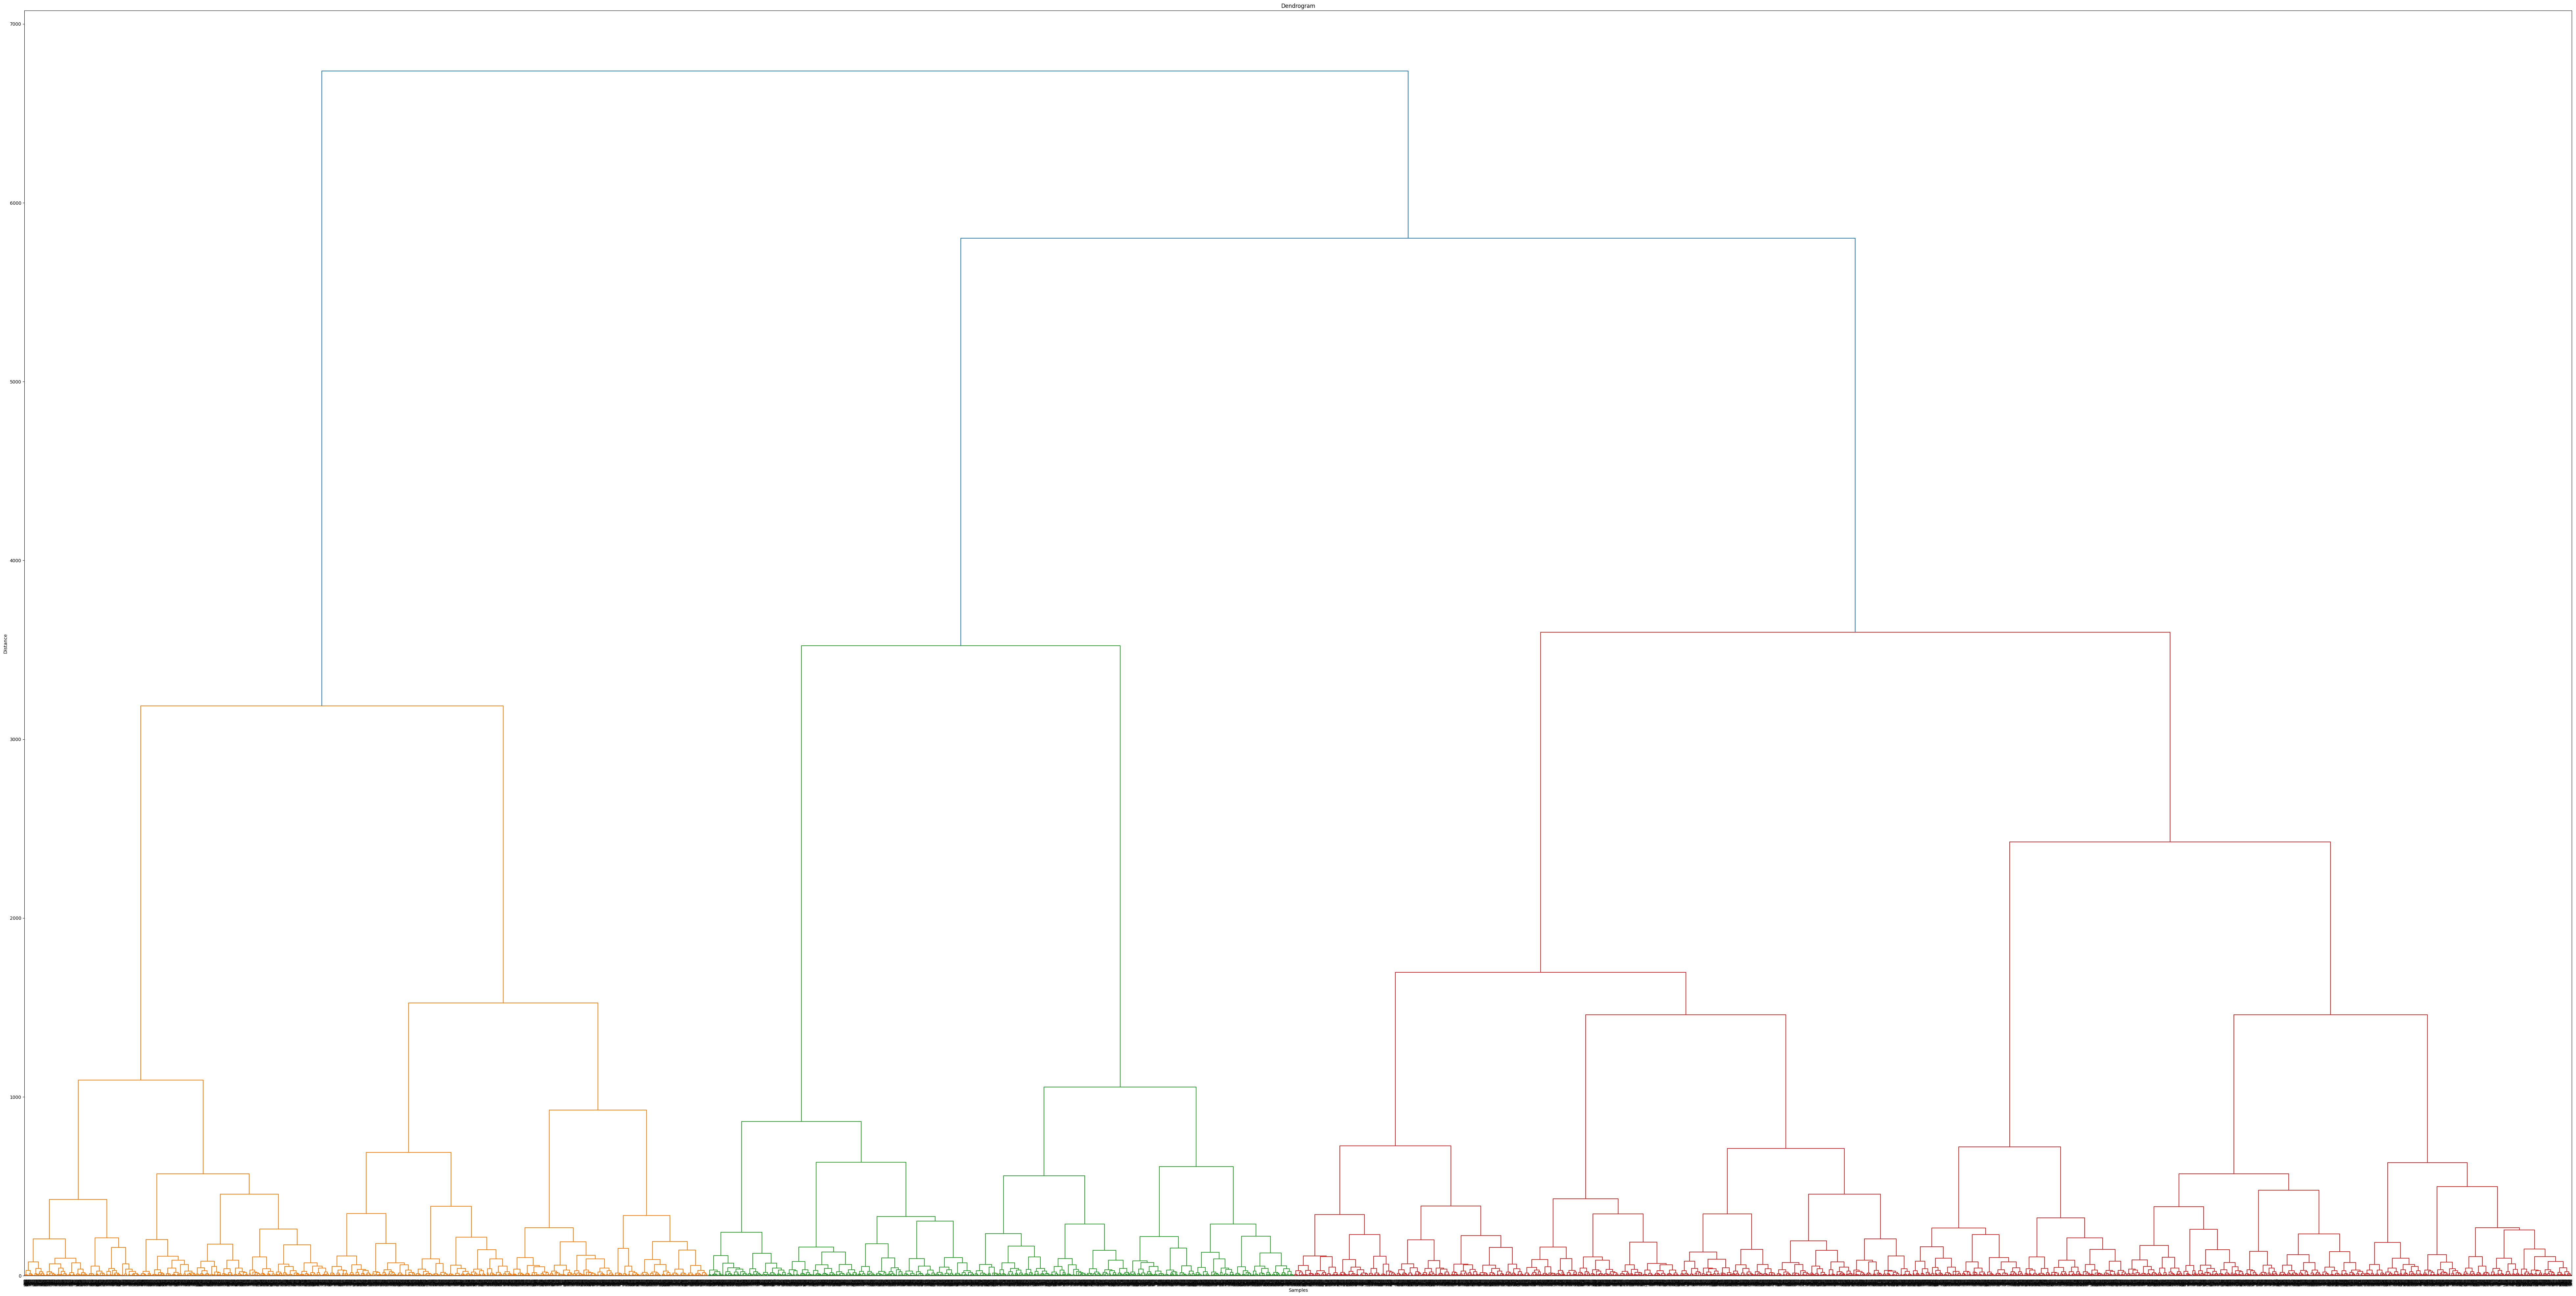

In [46]:
# Дендрограмма
# Выполнение агломеративной кластеризации
Z = linkage(tsne_result, method='ward')

# Визуализация дендрограммы
plt.figure(figsize=(100, 50))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()